In [ ]:
'''
Datasets:
    1. Federal Debt: https://fred.stlouisfed.org/series/GFDEBTN 
    2. Gross Domestic Product: https://fred.stlouisfed.org/series/FYGDP 
'''

In [295]:
import pandas as pd
import numpy as np

In [296]:
df_debt = pd.read_csv("debt.csv")
df_debt.head()

df_gdp = pd.read_csv("gdp.csv")
df_gdp.head()

df_debt['DATE'] = df_debt['DATE'].apply(lambda x: x[:4])
df_gdp['DATE'] = df_gdp['DATE'].apply(lambda x: x[:4])

df_debt = df_debt.rename(columns={"DATE":"Year","GFDEBTN":"Federal Debt"})
df_gdp = df_gdp.rename(columns={"DATE":"Year","FYGDP":"GDP"})

#Federal debt dataset has debt data in millions of dollars. Converting it to billions of dollars
df_debt['Federal Debt'] = df_debt['Federal Debt'].apply(lambda x: x/1000)
df_debt['Federal Debt'] = df_debt['Federal Debt'].apply(lambda x: round(x,2))

df_debt = df_debt.set_index(df_debt['Year'])
df_debt = df_debt.drop(['Year',], axis=1)
df_debt

df_gdp = df_gdp.set_index(df_gdp['Year'])
df_gdp = df_gdp.drop(['Year',], axis=1)
df_gdp

df = pd.merge(df_debt,df_gdp,how='inner',left_index=True,right_index=True)

debt_exceeds_gdp = df[df['Federal Debt']>df['GDP']]
debt_exceeds_gdp = debt_exceeds_gdp.reset_index()['Year'] 

debt_exceeds_gdp[0]

df = df.reset_index()
df.head()

,Year,Federal Debt,GDP
0,1966,322.79,780.5
1,1967,333.60,836.5
2,1968,351.90,897.6
3,1969,360.34,980.3
4,1970,377.48,1046.7


In [297]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [298]:
%matplotlib notebook

<IPython.core.display.Javascript object>


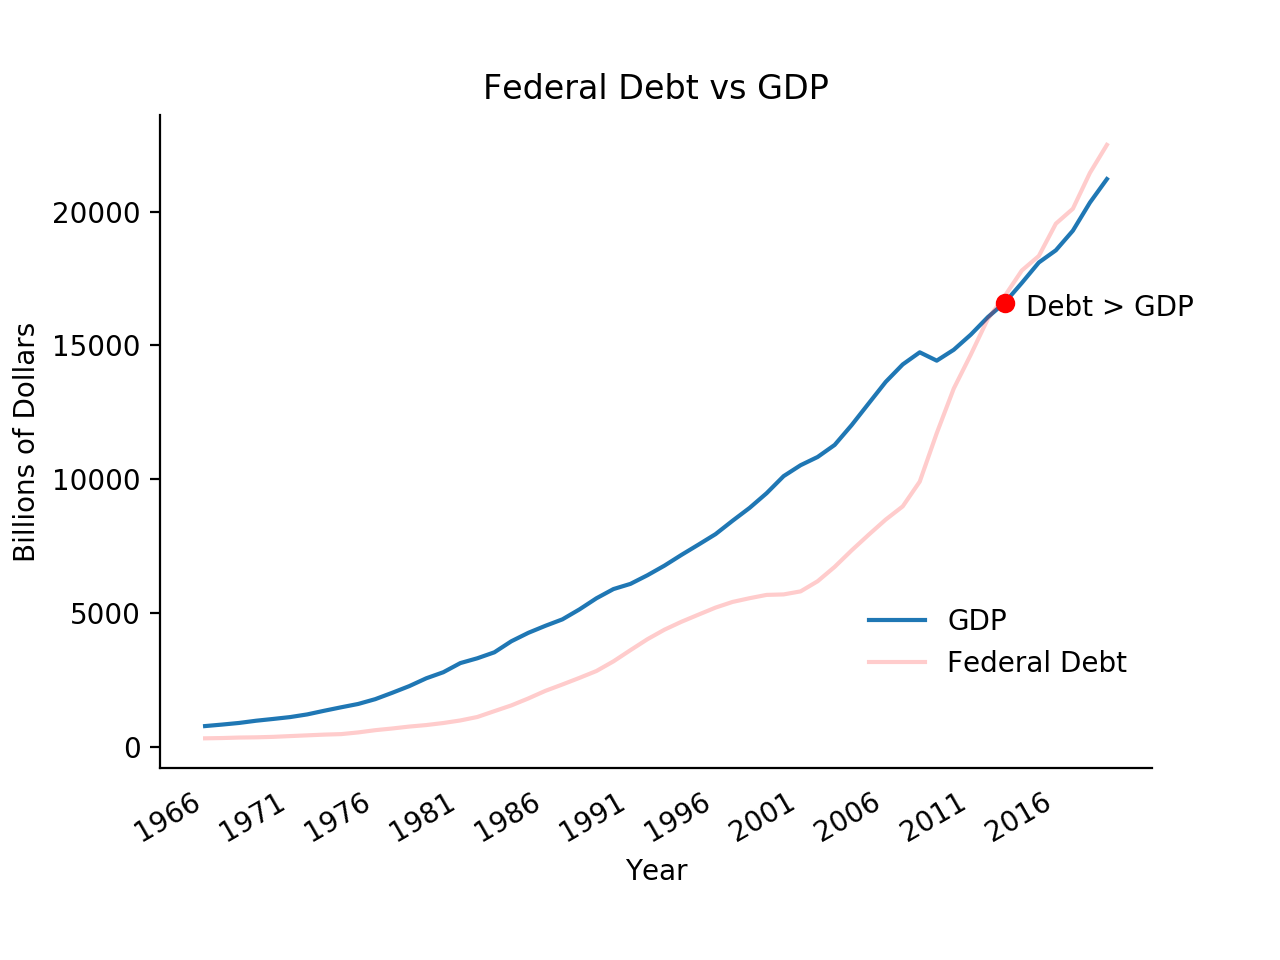

In [300]:
fig, ax = plt.subplots()
a = ax.plot(list(df["Year"]), df["GDP"], label="GDP", zorder=10)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel("Year")
plt.ylabel("Billions of Dollars")
plt.title("Federal Debt vs GDP")

b = ax.plot(list(df["Year"]),df["Federal Debt"], alpha=0.2, label="Federal Debt", color="Red", zorder=10)

plt.plot(47, df.iloc[47]['GDP'], marker='o', markersize=6, color="red", zorder=50)

plt.annotate("Debt > GDP", # this is the text
                 (47, df.iloc[47]['GDP']), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(38,-5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

xticks = []
every_nth = 5
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
        ax.xaxis.set_ticks_position('none')
    
fig.autofmt_xdate()
plt.legend(loc='lower right',frameon=False,bbox_to_anchor=(1, 0.1))
plt.show()

In [ ]:
'''
Analysis:
    This visualisation aims to find an answer to a question about correlation between GDP and Federal Debt of the 
    United States government over the years. The two websites mentioned had datasets regarding GDP and Federal Debt 
    values recorded over a period of years in the form of downloadable csv files. The years for which the 2 datasets 
    had data was different and hence and intersection of the common years was taken so as to determine trend. Both 
    datasets were plotted as line graphs on a single graph.


    Plot shows GDP and Federal debt trends from the year 1966 to 2019. From the graph it is clear that both GDP and 
    Federal debt have grown since the beginning. However in 2013, the debt surpassed the GDP of the country and has 
    remained greater than the Gross GDP ever since. 
'''

In [ ]:
'''
How visual stimulus has been added
    A lot of unwanted year labels along the x-axis have been removed. A greater Data to ink ratio has been kept 
    in mind while plotting the graph. Minimalistic colours have been used so as to ensure ease of data interpretation 
    along with increased functionality due to better visual stimulus.
'''